In [71]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import scipy
import seaborn as sns
import matplotlib.pylab as plt

In [72]:
FS0005=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.005_time_1.dat")
FS001=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.01_time_1.dat")
FS002=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.02_time_1.dat")
FS003=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.03_time_1.dat")
FS005=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.05_time_1.dat")

C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\2144500843.py:1: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS0005=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.005_time_1.dat")
C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\2144500843.py:2: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS001=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.01_time_1.dat")
C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\2144500843.py:3: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS002=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Barkhausen/FS78G_0.02_time_1.dat")
C:\Users\Francesco\AppData\Local\Temp\ipy

In [73]:
df=pd.DataFrame(data=FS0005,columns=["Voltage"])
df["Frequency"]=0.005
df['time'] = range(1, len(df) + 1)
df1=pd.DataFrame(data=FS001,columns=["Voltage"])
df1["Frequency"]=0.01
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)
df1=pd.DataFrame(data=FS002,columns=["Voltage"])
df1["Frequency"]=0.02
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)
df1=pd.DataFrame(data=FS003,columns=["Voltage"])
df1["Frequency"]=0.03
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)
df1=pd.DataFrame(data=FS005,columns=["Voltage"])
df1["Frequency"]=0.05
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)

C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\1180798645.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\1180798645.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\1180798645.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_21272\1180798645.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)


In [74]:
df

,Voltage,Frequency,time
0,-4.219238e-09,0.005,1
1,5.780762e-09,0.005,2
2,-2.021924e-08,0.005,3
3,-1.821924e-08,0.005,4
4,5.778076e-08,0.005,5
...,...,...,...
16379,1.552041e-07,0.050,16380
16380,1.552041e-07,0.050,16381
16381,9.120410e-08,0.050,16382
16382,7.520410e-08,0.050,16383


In [75]:
plt.rcParams.update({'font.size': 18})


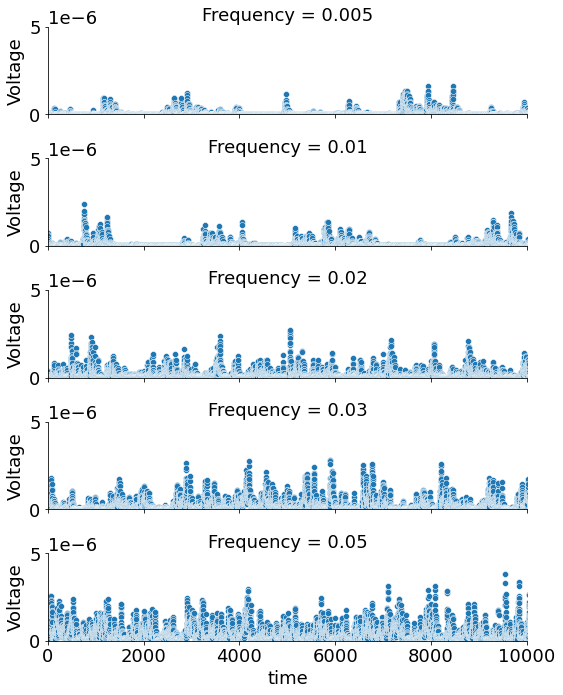

In [76]:
g = sns.FacetGrid(df, row="Frequency", height=2, aspect=4.)
g.map_dataframe(sns.scatterplot, x="time", y="Voltage")
plt.ylim((0,5e-6))
plt.xlim((0,10000))
g.set_axis_labels("time", "Voltage")

In [77]:
media=df.groupby("Frequency").mean()

media.reset_index(inplace=True)
media

,Frequency,Voltage,time
0,0.005,2.557245e-08,32768.5
1,0.010,7.987701e-08,32768.5
2,0.020,1.544379e-07,8192.5
3,0.030,2.276757e-07,16384.5
4,0.050,4.124690e-07,8192.5


<AxesSubplot:xlabel='Frequency', ylabel='Voltage'>

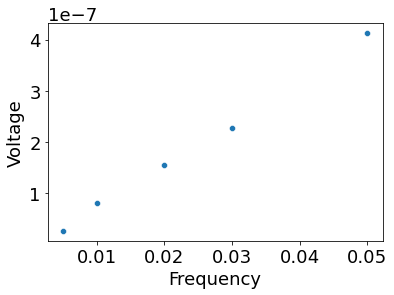

In [78]:
sns.scatterplot(data=media, x="Frequency", y="Voltage")

<AxesSubplot:xlabel='Frequency', ylabel='Voltage'>

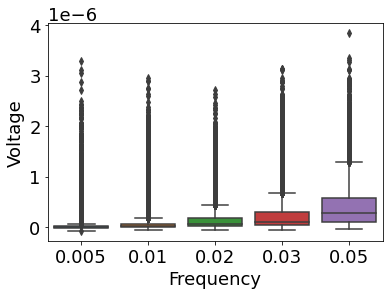

In [79]:
sns.boxplot(data=df, x="Frequency", y="Voltage")
#quandp ho molti outliers il boxplltot non rispecchia bene la distribuzione 
#èroviamo a farlo sul logaritmo del valore

C:\Users\Francesco\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Frequency', ylabel='log(Voltage)'>

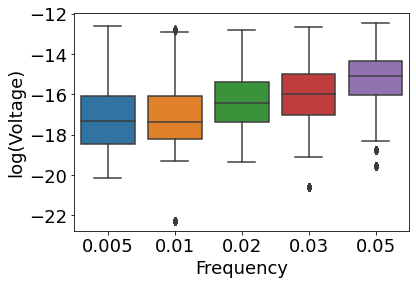

In [80]:
df["log(Voltage)"]=np.log(df.Voltage)
df=df.dropna()
sns.boxplot(data=df, x="Frequency", y="log(Voltage)")

#il boxplot del logaritmo della variabile rende le distribuzioni molto simmetriche

(0.0, 1e-06)

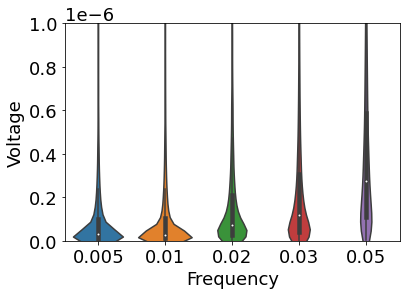

In [81]:

sns.violinplot(data=df, x="Frequency", y="Voltage")
plt.ylim((0,1e-06))

(array([2.47868013e+06, 1.90773009e+06, 1.48575856e+06, 1.14995296e+06,
        9.79231656e+05, 8.43137783e+05, 6.36178461e+05, 5.18606239e+05,
        4.63041285e+05, 4.13113355e+05, 3.36610882e+05, 3.14868074e+05,
        2.29507419e+05, 2.07764611e+05, 1.73942465e+05, 1.28040981e+05,
        1.24014535e+05, 9.66347029e+04, 9.82452813e+04, 7.65024731e+04,
        8.05289191e+04, 4.50961947e+04, 4.91226406e+04, 3.06009893e+04,
        2.97957001e+04, 2.25480973e+04, 2.17428082e+04, 1.69110730e+04,
        1.12740487e+04, 1.12740487e+04, 8.85818110e+03, 1.04687595e+04,
        5.63702434e+03, 6.44231353e+03, 1.61057838e+03, 4.02644595e+03,
        2.41586757e+03, 6.44231353e+03, 2.41586757e+03, 0.00000000e+00,
        2.41586757e+03, 0.00000000e+00, 8.05289191e+02, 1.61057838e+03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.05289191e+02]),
 array([3.20410156e-09, 7.99241016e-08, 1.56644102e-07, 2.33364102e-07,
        3.10084102e-07

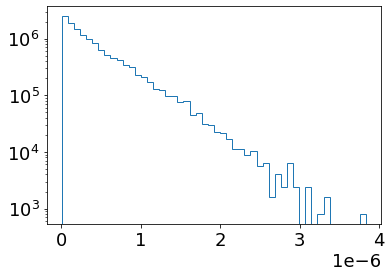

In [94]:
plt.hist(df[df["Frequency"]==0.05].Voltage,bins=50, density=True, label='data',
         log=True, histtype="step")



In [95]:
#ESERCIZIO A CASA

In [113]:
c, loc, v_0= scipy.stats.gamma.fit(df[df["Frequency"]==0.005].Voltage, floc=0)
c2, loc2, v2= scipy.stats.gamma.fit(df[df["Frequency"]==0.01].Voltage, floc=0)
c3, loc3, v3= scipy.stats.gamma.fit(df[df["Frequency"]==0.02].Voltage, floc=0)
c4, loc4, v4= scipy.stats.gamma.fit(df[df["Frequency"]==0.03].Voltage, floc=0)
c5, loc5, v5= scipy.stats.gamma.fit(df[df["Frequency"]==0.05].Voltage, floc=0)

v1, v2, v3, v4, v5
v=[v_0, v2, v3, v4, v5]
c=[c, c2, c3, c4, c5]
loc=[loc, loc2, loc3, loc4, loc5]

In [115]:
xmin=0
xmax=4e-6
x = np.linspace(xmin,xmax,101)



C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6647: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6647: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


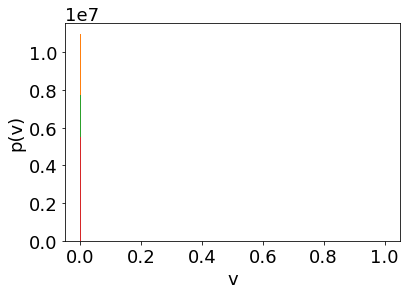

In [129]:
i=0
while i <= 4:
    plt.hist(df[df["Frequency"]==i*0.01].Voltage,bins=50, density=True, label='data',stacked=True, log=None, histtype="step")
    gg=scipy.stats.gamma(c[i], loc[i]==0, scale=v[i])
    plt.plot(x, gg.pdf(x), label="Fit 1", color="black")
    plt.xlabel('v')
    plt.ylabel('p(v)')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    i=i+1

C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6647: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


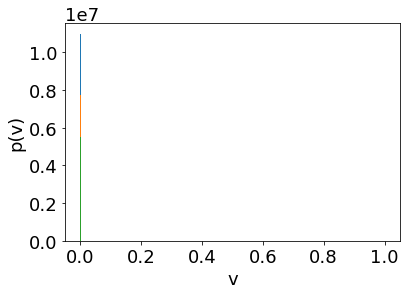

In [130]:
i=1
while i <= 4:
    plt.hist(df[df["Frequency"]==i*0.01].Voltage,bins=50, density=True, label='data',stacked=True, log=None, histtype="step")
    gg=scipy.stats.gamma(c[i], loc[i]==0, scale=v[i])
    plt.plot(x, gg.pdf(x), label="Fit 1", color="black")
    plt.xlabel('v')
    plt.ylabel('p(v)')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    i=i+1

C:\Users\Francesco\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6647: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


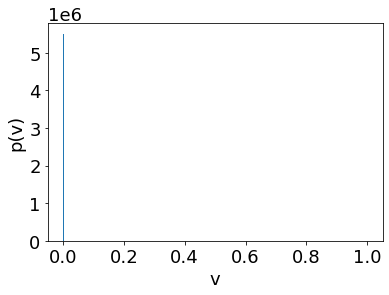

In [132]:
i=3
while i <= 4:
    plt.hist(df[df["Frequency"]==i*0.01].Voltage,bins=50, density=True, label='data',stacked=True, log=None, histtype="step")
    gg=scipy.stats.gamma(c[i], loc[i]==0, scale=v[i])
    plt.plot(x, gg.pdf(x), label="Fit 1", color="black")
    plt.xlabel('v')
    plt.ylabel('p(v)')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    i=i+1